In [175]:
import pandas as pd
import numpy as np
import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import tqdm
import re
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score

In [126]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [127]:
print(data['sentiment'].value_counts())    #It is a balanced dataset
print(data.shape)

sentiment
positive    25000
negative    25000
Name: count, dtype: int64
(50000, 2)


In [128]:
#checking for null values
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [129]:
X = data['review']
y = data['sentiment']

In [130]:
# mapping of sentiment - 'positive' : 1 ; 'negative': 0
def map_sentiment(data):
    if data =='positive':
        return 1
    else:
        return 0

y = y.map(map_sentiment) 

In [131]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

Text Cleaning and preprocessing

In [132]:
stemmer = SnowballStemmer('english')
stop_words = stopwords.words('english')

In [133]:
def remove_stopwords(text):
    text = " ".join([i.lower() for i in text.split() if i.lower() not in stop_words])

In [134]:
def stemming(text):
    text = " ".join([stemmer.stem(i) for i in text.split()])
    return text

In [135]:
# Performing decontractions on data
def decontraction(text):
    text = re.sub(r"won't","will not",text)
    text = re.sub(r"can't","can not",text)
    text = re.sub(r"n't","not",text)
    text = re.sub(r"\'re","are",text)
    text = re.sub(r"\'s"," is",text)
    text = re.sub(r"\'d"," would",text)
    text = re.sub(r"\'ll"," will",text)
    text = re.sub(r"\'t"," not",text)
    text = re.sub(r"\'ve"," have",text)
    text = re.sub(r"\'m"," am",text)
    return text

In [136]:
# Removing HTML content from data
def preprocessing_html(text):
    phrase = BeautifulSoup(text).get_text()
    return phrase

In [137]:
# Removing URLs from data
def preprocessing_url(text):
    text = re.sub(r'http\S+','',text)
    text = re.sub(r'www\S+','',text)
    return text


In [138]:
# #Single Function for text preprocessing
# def text_preprocessing(df):
#     arr = []
#     for text in tqdm.tqdm((df)):
#         text = preprocessing_url(df[i])
#         text = preprocessing_html(text)
#         text = decontraction(text)
#         text = remove_stopwords(text)
#         text = stemming(text)
#         text = re.sub('\S*\d\S*',"",text)    # removes any substrings from the string text that contain at least one digit surrounded by non-digit characters.
#         text = re.sub('[^A-Za-z0-9]+'," ",text) # replaces any sequence of characters in the string s that is not a letter or a digit with a single space character " ".
#         arr.append(text)

#     return arr

In [144]:
corpus = []
for i in tqdm.tqdm(range(len(X))):
    text = re.sub('[^a-zA-Z]', ' ',X[i])
    text = re.sub(r'http\S+','',text)       #removing URLs
    text = re.sub(r'www\S+','',text)        #removing URLs
    text = BeautifulSoup(text).get_text()
    text = text.lower()
    text = decontraction(text)
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

100%|██████████| 50000/50000 [42:58<00:00, 19.39it/s]    


In [ ]:
# corpus = []
# for i in tqdm.tqdm(range(len(X))):
#     text = re.sub('[^a-zA-Z]', ' ',X[i])
#     text = re.sub(r'http\S+','',text)       #removing URLs
#     text = re.sub(r'www\S+','',text)        #removing URLs
#     text = BeautifulSoup(text).get_text()
#     text = decontraction(text)
#     text = [word.lower() for word in text.split() if word.lower() not in stopwords.words('english')]
#     text = [stemmer.stem(i) for i in text]
#     text = ' '.join(text)
#     corpus.append(text)

Building our RNN Model

In [154]:
#Importing Modules 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM , Bidirectional
from tensorflow.keras.layers import Dense
from keras.layers import Dropout

In [151]:
#Embedding matrix
voc_size = 5000
onehot_repr = [one_hot(words,voc_size) for words in corpus]


In [152]:
#Embedding Layer
sent_length = 150
embedded_docs= pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[1592 2085 4402 ... 1324 4496 4567]
 [   0    0    0 ... 4082 3936 3776]
 [   0    0    0 ...  299 3123 2680]
 ...
 [   0    0    0 ...  406 1722  579]
 [   0    0    0 ...  985 2899 4181]
 [   0    0    0 ...  129 3881  932]]


In [153]:
embedded_docs[0]

array([1592, 2085, 4402, 4901, 4551,  299, 1867,  202, 2266, 2178, 4890,
        202, 4037, 2677,  443, 3492,  895, 2085, 2904, 3240, 4934, 4551,
       4291, 4291, 1659,  384, 4763, 1078, 1943, 1074, 1100, 1674, 3052,
       4785, 3797, 4506, 2517, 3624, 2282, 3701, 4220, 3181, 3149, 1207,
       4510, 1614,  342, 4903, 3330, 2517, 2443, 4204, 1418, 3938,  671,
       3661,  579, 1037, 3602, 1640,  143, 4899, 1541,  512, 1081,  833,
       2480, 2175, 3701, 4291, 4291, 2061,  889, 3797, 1780,  202, 2286,
       2626, 1993,  202, 2178,   40, 1103,  439, 4172, 1058,  812,   40,
       4187,   40, 2807,  384, 3243,  725, 4881, 4104, 2904, 1744, 4564,
       2871,  256,  889, 1220, 1452, 2898, 1577,  384, 4747, 4152,  342,
       3072,  415, 2085, 2085, 2780, 2394, 2321, 3095, 3116, 4428, 2384,
       2537, 3113, 3701, 3936, 1278,   16, 3175, 4428, 4061, 3701, 2282,
       2286,  424,  942,  123, 3701,  677, 1452,  384,  679,  951, 1128,
        310,  275, 1723, 3113, 1324, 4496, 4567])

In [156]:
#Buidling our model
embedding_dim = 100   
model = Sequential() 
model.add(Embedding(voc_size,embedding_dim,input_length=sent_length))   
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 100)          500000    
                                                                 
 bidirectional (Bidirection  (None, 200)               160800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 661001 (2.52 MB)
Trainable params: 661001 (2.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [157]:
X_final = np.array(embedded_docs)
y_final=np.array(y)
X_final.shape,y_final.shape

((50000, 150), (50000,))

<h3> Splitting test and train data

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [159]:
epochs = 25
batch_size = 200
histor = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25,batch_size=200)

Epoch 1/25


168/168 [==============================] - 82s 466ms/step - loss: 0.4332 - accuracy: 0.7957 - val_loss: 0.3219 - val_accuracy: 0.8619
Epoch 2/25
168/168 [==============================] - 70s 416ms/step - loss: 0.2957 - accuracy: 0.8801 - val_loss: 0.3325 - val_accuracy: 0.8607
Epoch 3/25
168/168 [==============================] - 69s 410ms/step - loss: 0.2667 - accuracy: 0.8919 - val_loss: 0.3295 - val_accuracy: 0.8631
Epoch 4/25
168/168 [==============================] - 68s 405ms/step - loss: 0.2400 - accuracy: 0.9045 - val_loss: 0.3503 - val_accuracy: 0.8587
Epoch 5/25
168/168 [==============================] - 69s 411ms/step - loss: 0.2149 - accuracy: 0.9141 - val_loss: 0.3631 - val_accuracy: 0.8544
Epoch 6/25
168/168 [==============================] - 69s 409ms/step - loss: 0.1937 - accuracy: 0.9241 - val_loss: 0.3864 - val_accuracy: 0.8501
Epoch 7/25
168/168 [==============================] - 70s 414ms/step - loss: 0.1756 - accuracy: 0.9306 - val_loss: 0.4264 - val_

In [163]:
histor

In [172]:
y_pred = (model.predict(X_test)>0.5).astype("int32")

516/516 [==============================] - 11s 21ms/step


In [178]:
score = accuracy_score(y_test,y_pred)
print(score*100,"%")

82.5939393939394 %


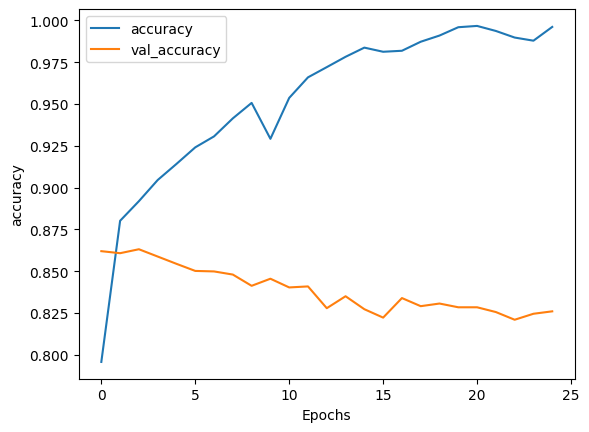

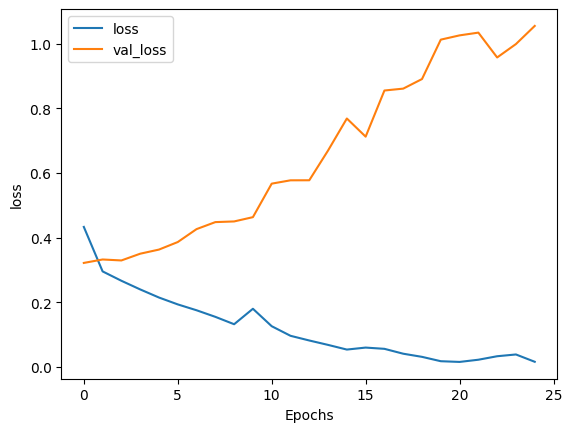

In [179]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(histor, "accuracy")
plot_graphs(histor, "loss")